In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, palette="binary")
formatter = ticker.ScalarFormatter(useMathText=True)

# Binary data

In [3]:
manila = pd.read_csv('manila_binary/measures.csv')
our = pd.read_csv('our_approach_binary/measures.csv')
aequitas = pd.read_csv('aequitas_binary/measures.csv')
manila_time = pd.read_fwf('manila_binary/times.txt', header=None)
manila["time"] = manila_time
our_time = pd.read_fwf('our_approach_binary/times.txt', header=None)
our['time'] = our_time
aequitas_time = pd.read_fwf('aequitas_binary/times.txt', header=None)
aequitas['time'] = aequitas_time
manila['approach'] = 'Manila'
aequitas['approach'] = 'Aequitas'
our['approach'] = 'Our approach'
full = pd.concat([manila, aequitas, our])

## CPU Consumption

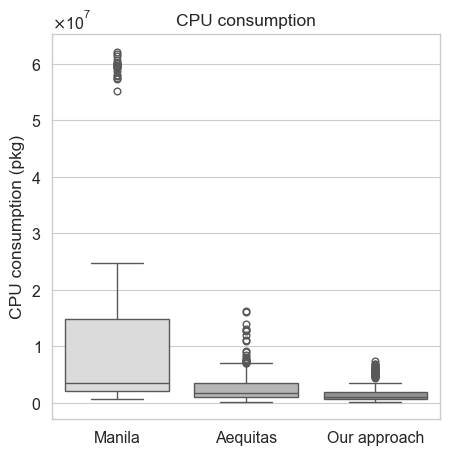

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x='approach', y='pkg', hue='approach', ax=ax)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.title('CPU consumption')
plt.savefig('pkg.png', dpi=300, bbox_inches='tight')
plt.show()

In [5]:
stats.kruskal(manila['pkg'], our['pkg'], aequitas['pkg'])

KruskalResult(statistic=190.4712127039268, pvalue=4.3621608997303524e-42)

## Execution time

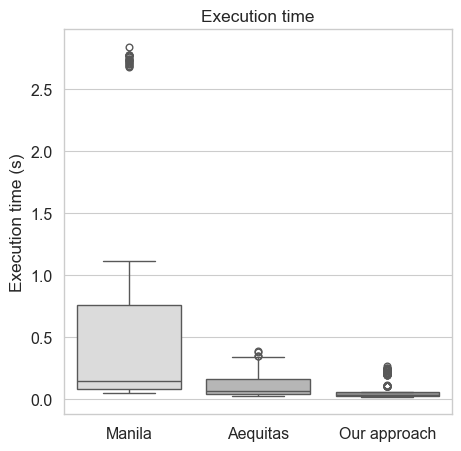

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
stats.kruskal(manila['time'], our['time'], aequitas['time'])

KruskalResult(statistic=246.77156423500384, pvalue=2.5955875422184498e-54)

# Binary and multi-class datasets

In [8]:
manila = pd.read_csv("manila_full/measures.csv")
our = pd.read_csv("our_approach_full/measures.csv")
manila_time = pd.read_fwf("manila_full/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf("our_approach_full/times.txt", header=None)
our["time"] = our_time
manila["approach"] = "Manila"
our["approach"] = "Our approach"
full = pd.concat([manila, our])

## CPU consumption

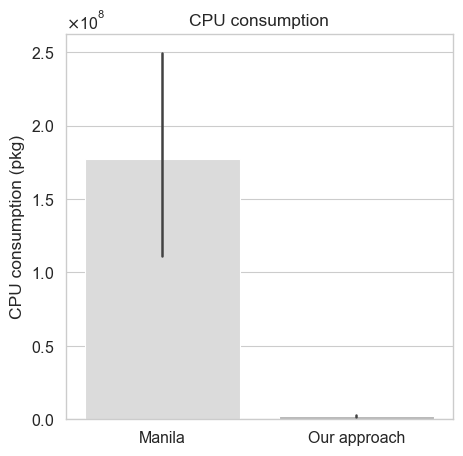

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="pkg", hue="approach", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(formatter)
plt.title("CPU consumption")
plt.show()

In [10]:
stats.kruskal(manila["pkg"], our["pkg"])

KruskalResult(statistic=532.1861924951079, pvalue=9.447842142630729e-118)

## Training time

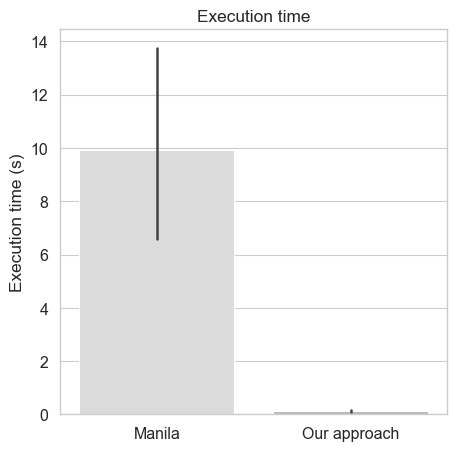

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
plt.title("Execution time")
plt.savefig("time.png", dpi=300, bbox_inches="tight")
plt.show()

In [12]:
stats.kruskal(manila["time"], our["time"])

KruskalResult(statistic=566.3428192133081, pvalue=3.506357979286234e-125)

## Model training time

C:\Users\giord\AppData\Local\Temp\ipykernel_15188\1360582588.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])


<Axes: xlabel='model', ylabel='pkg'>

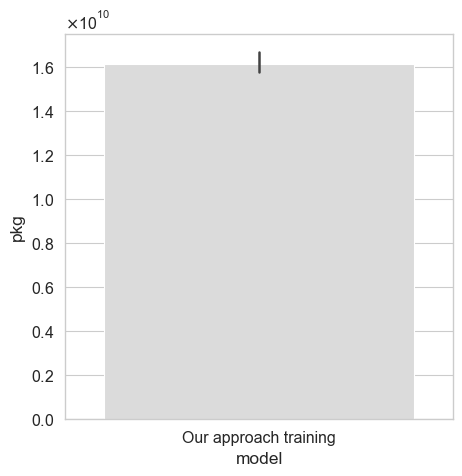

In [14]:
model_measures = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/measures/"):
  model_measures = pd.concat([model_measures, pd.read_csv(f"model_training_grid_search_full/measures/{file}")])

model_measures['model'] = 'Our approach training'
fig, ax = plt.subplots(figsize=(5, 5))
ax.yaxis.set_major_formatter(formatter)
sns.barplot(data=model_measures, x="model", y="pkg", ax=ax)

In [21]:
model_times = pd.DataFrame()
for file in os.listdir("model_training_grid_search_full/times/"):
    model_times = pd.concat(
        [
            model_times,
            pd.read_fwf(f"model_training_grid_search_full/times/{file}"),
        ]
    )
model_times
# model_times["model"] = "Our approach training"
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.yaxis.set_major_formatter(formatter)
# sns.barplot(data=model_times, ax=ax)

,<module,'time',(built-in)>


## Prediction comparison

In [38]:
def map_values(x):
  if x > 0.2:
    return 1
  else: 
    return 0

manila = pd.DataFrame()
for file in os.listdir('manila_full/manila_results/'):
  manila = pd.concat([manila, pd.read_csv(f'manila_full/manila_results/{file}', index_col=0)[['stat_par', 'eq_odds', 'ao']]])
manila = manila.map(map_values)

In [39]:
our = pd.DataFrame()
for file in os.listdir('our_approach_full/our_approach_results/'):
    our = pd.concat(
        [
            our,
            pd.read_csv(f"our_approach_full/our_approach_results/{file}", index_col=0)
        ]
    )

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print('Statistical parity', accuracy_score(manila['stat_par'], our['0']))

Statistical parity 0.34782608695652173


In [42]:
print("Equal opportunity", accuracy_score(manila["eq_odds"], our["1"]))

Equal opportunity 0.6086956521739131


In [43]:
print("Average odds", accuracy_score(manila["ao"], our["2"]))

Average odds 0.6521739130434783


## Aequitas

In [112]:
aequitas = pd.DataFrame()
for file in os.listdir('aequitas/aequitas_results/'):
    aequitas = pd.concat(
        [
            aequitas,
            pd.read_csv(f"aequitas/aequitas_results/{file}", index_col=0)[['tpr', 'fpr']]
        ]
    )
aequitas['ao'] = aequitas['tpr'] - aequitas['fpr']

In [117]:
aequitas = aequitas.loc[0]
aequitas = aequitas.map(map_values)